In [2]:
import pandas as pd
import requests

data = []

# timestamp 01.01.2024
timestamp = 1704063600000 

# end timestamp 31
end_timestamp = 1735513200000 

while timestamp <= end_timestamp:
    res = requests.get(f"https://www.smard.de/app/chart_data/4068/DE/4068_DE_quarterhour_{timestamp}.json")
    data.extend(res.json()["series"])
    print("last timestamp:", data[-1][0])
    timestamp = data[-1][0] + 900000

print(data)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["timestamp", "value"])
df["datetime"] = (
    pd.to_datetime(df["timestamp"], unit="ms")
      .dt.tz_localize("UTC")
      .dt.tz_convert("Europe/Berlin")
)

# Extract date and time slot
df["date"] = df["datetime"].dt.date
df["time_slot"] = df["datetime"].dt.strftime("%H:%M")

# Pivot into desired shape
pivot = df.pivot_table(
    index="time_slot",
    columns="date",
    values="value",
    aggfunc="first"   # or "mean", "sum", depending on what you need
)

# Create complete date range for 2024
all_dates = pd.date_range("2024-01-01", "2024-12-31", freq="D").date
all_times = pd.date_range("00:00", "23:45", freq="15min").strftime("%H:%M")

# Reindex to ensure full structure
pivot = pivot.reindex(index=all_times, columns=all_dates)

pivot

last timestamp: 1704667500000
last timestamp: 1705272300000
last timestamp: 1705877100000
last timestamp: 1706481900000
last timestamp: 1707086700000
last timestamp: 1707691500000
last timestamp: 1708296300000
last timestamp: 1708901100000
last timestamp: 1709505900000
last timestamp: 1710110700000
last timestamp: 1710715500000
last timestamp: 1711320300000
last timestamp: 1711921500000
last timestamp: 1712526300000
last timestamp: 1713131100000
last timestamp: 1713735900000
last timestamp: 1714340700000
last timestamp: 1714945500000
last timestamp: 1715550300000
last timestamp: 1716155100000
last timestamp: 1716759900000
last timestamp: 1717364700000
last timestamp: 1717969500000
last timestamp: 1718574300000
last timestamp: 1719179100000
last timestamp: 1719783900000
last timestamp: 1720388700000
last timestamp: 1720993500000
last timestamp: 1721598300000
last timestamp: 1722203100000
last timestamp: 1722807900000
last timestamp: 1723412700000
last timestamp: 1724017500000
last times

date,2024-01-01,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-06,2024-01-07,2024-01-08,2024-01-09,2024-01-10,...,2024-12-22,2024-12-23,2024-12-24,2024-12-25,2024-12-26,2024-12-27,2024-12-28,2024-12-29,2024-12-30,2024-12-31
00:00,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,1.00,...,1.50,1.75,1.50,1.50,1.75,1.75,2.00,2.50,1.50,2.00
00:15,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,1.50,1.50,1.50,1.50,2.00,1.50,1.50,2.00,1.50,1.75
00:30,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.75,1.50,1.75
00:45,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,1.50,1.50,1.75,1.50,1.50,1.50,1.50,1.75,1.50,1.75
01:00,0.75,0.75,0.75,0.75,0.75,0.75,0.50,0.75,0.75,1.00,...,1.50,2.00,1.50,1.50,1.50,1.50,1.75,1.50,1.50,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,2.25,1.50,1.50,1.75,1.50,1.50,1.75,1.50,1.50,1.50
23:00,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,2.50,1.75,2.00,4.25,2.50,1.50,2.00,1.50,1.50,2.00
23:15,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,1.75,1.50,1.75,3.00,1.50,1.50,1.75,1.50,1.75,1.50
23:30,0.75,0.75,0.75,0.50,0.75,0.75,0.75,1.00,0.75,0.75,...,1.75,1.50,1.50,2.50,1.50,1.50,1.75,1.50,1.50,1.50


In [3]:
import datetime
pivot[datetime.date(2024, 1, 1)][1]

C:\Users\astau\AppData\Local\Temp\ipykernel_15544\2600133556.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivot[datetime.date(2024, 1, 1)][1]


np.float64(1.0)

In [4]:
values = pivot.values.ravel(order="F")
values[35135]

np.float64(1.5)

In [5]:
pivot.isna().sum()

date
2024-01-01    0
2024-01-02    0
2024-01-03    0
2024-01-04    0
2024-01-05    0
             ..
2024-12-27    0
2024-12-28    0
2024-12-29    0
2024-12-30    0
2024-12-31    0
Length: 366, dtype: int64

In [6]:
pivot = pivot.fillna(0.5)

In [7]:
test = pivot.loc[:, pivot.isna().any()]

In [8]:
test = pivot.loc[:, pivot.isna().any()]
nan_positions = test[test.isna().any(axis=1)]
nan_positions

date


In [9]:
pivot.to_csv("./data/PV_2024.csv")

In [10]:
# values go from 0.5 to 11000 -> cap it to 0 - 1
vmin = pivot.min().min()
vmax = pivot.max().max()

df_solar_profile = (pivot - vmin) / (vmax - vmin)
df_solar_profile

date,2024-01-01,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-06,2024-01-07,2024-01-08,2024-01-09,2024-01-10,...,2024-12-22,2024-12-23,2024-12-24,2024-12-25,2024-12-26,2024-12-27,2024-12-28,2024-12-29,2024-12-30,2024-12-31
00:00,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000042,...,0.000085,0.000106,0.000085,0.000085,0.000106,0.000106,0.000127,0.000170,0.000085,0.000127
00:15,0.000042,0.000042,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000085,0.000085,0.000085,0.000085,0.000127,0.000085,0.000085,0.000127,0.000085,0.000106
00:30,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000106,0.000085,0.000106
00:45,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000085,0.000085,0.000106,0.000085,0.000085,0.000085,0.000085,0.000106,0.000085,0.000106
01:00,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000021,0.000042,...,0.000085,0.000127,0.000085,0.000085,0.000085,0.000085,0.000106,0.000085,0.000085,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000149,0.000085,0.000085,0.000106,0.000085,0.000085,0.000106,0.000085,0.000085,0.000085
23:00,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000170,0.000106,0.000127,0.000319,0.000170,0.000085,0.000127,0.000085,0.000085,0.000127
23:15,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000106,0.000085,0.000106,0.000212,0.000085,0.000085,0.000106,0.000085,0.000106,0.000085
23:30,0.000021,0.000021,0.000021,0.000000,0.000021,0.000021,0.000021,0.000042,0.000021,0.000021,...,0.000106,0.000085,0.000085,0.000170,0.000085,0.000085,0.000106,0.000085,0.000085,0.000085


In [16]:
pivot = df_solar_profile

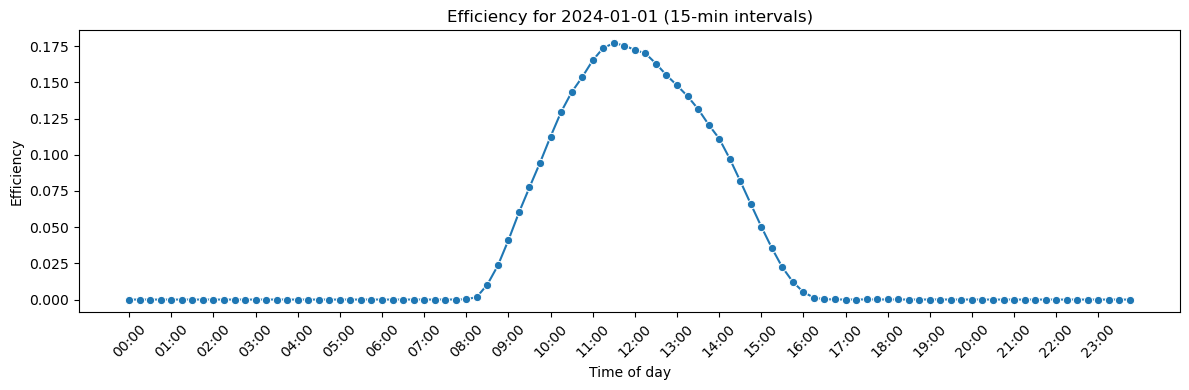

In [22]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select first day
first_day = pivot[datetime.date(2024, 1, 1)].reset_index()

# Rename for seaborn
first_day.columns = ["time_slot", "value"]

# Plot
plt.figure(figsize=(12,4))
sns.lineplot(data=first_day, x="time_slot", y="value", marker="o")

tick_positions = np.arange(0, len(first_day), 4)
plt.xticks(tick_positions, first_day["time_slot"].iloc[tick_positions], rotation=45)
plt.title("Efficiency for 2024-01-01 (15-min intervals)")
plt.xlabel("Time of day")
plt.ylabel("Efficiency")
plt.tight_layout()
plt.show()

In [18]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Map each column (date) to a season
season_map = {col: get_season(col) for col in pivot.columns}

In [19]:
# Create new DataFrame for seasonal averages
season_df = pd.DataFrame(index=pivot.index)

for season in ["Winter", "Spring", "Summer", "Fall"]:
    # Select columns for the season and compute mean along axis=1
    season_df[season] = pivot.loc[:, [col for col in pivot.columns if season_map[col] == season]].mean(axis=1)
# Long format for seaborn

season_df = season_df.reset_index().rename(columns={"index": "time_slot"})


season_long = season_df.melt(id_vars="time_slot", var_name="Season", value_name="Value")


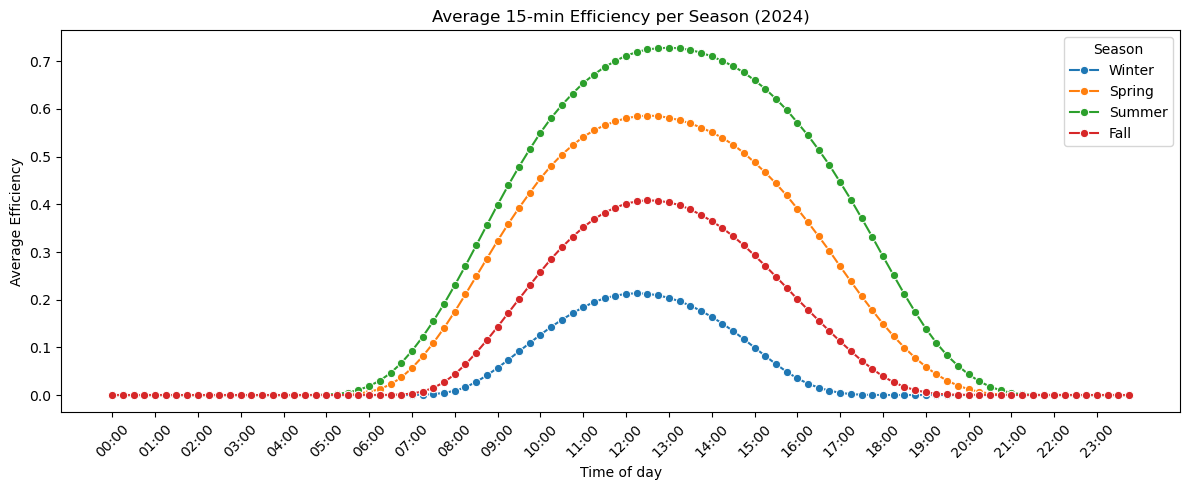

In [21]:
plt.figure(figsize=(12,5))
sns.lineplot(data=season_long, x="time_slot", y="Value", hue="Season", marker="o")

tick_positions = np.arange(0, len(first_day), 4)
plt.xticks(tick_positions, first_day["time_slot"].iloc[tick_positions], rotation=45)
plt.title("Average 15-min Efficiency per Season (2024)")
plt.xlabel("Time of day")
plt.ylabel("Average Efficiency")
plt.legend(title="Season")
plt.tight_layout()
plt.show()

In [15]:
import datetime
start = datetime.date(2024, 1, 1)

end = datetime.date(2025, 1, 1)

dif = start-end
abs(dif.days)

366